In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

%matplotlib inline

In [2]:
# Get image dataset

data_dir = pathlib.Path('./datasets/flower_photos')
image_count = len(list(data_dir.glob('*/*.jpg')))

print('Image count: ', image_count)

Image count:  3670


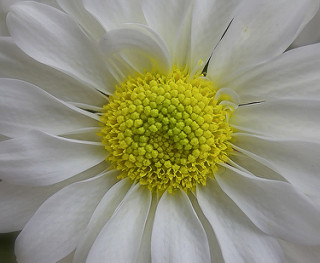

In [3]:
# Show image of daisy class
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[0]))

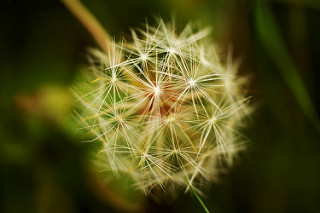

In [4]:
# Show image of dandelion class
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[0]))

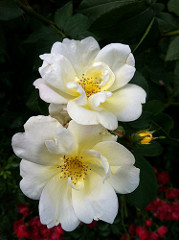

In [5]:
# Show image of rose class
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

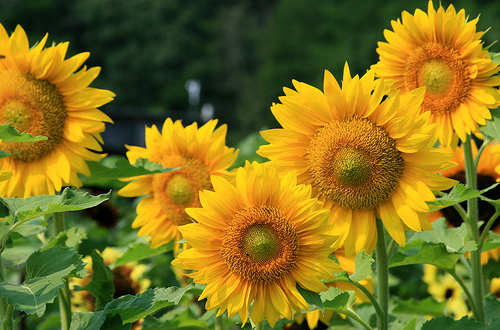

In [6]:
# Show image of sunflowers class
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[0]))

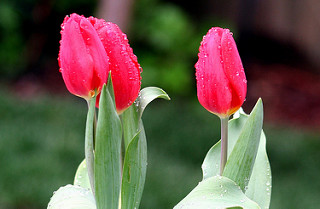

In [7]:
# Show image of tulips class
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [8]:
# Load images off disk
batch_size = 32
img_height = 180
img_width = 180

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
# Finding the class names of the dataset
class_names = train_dataset.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


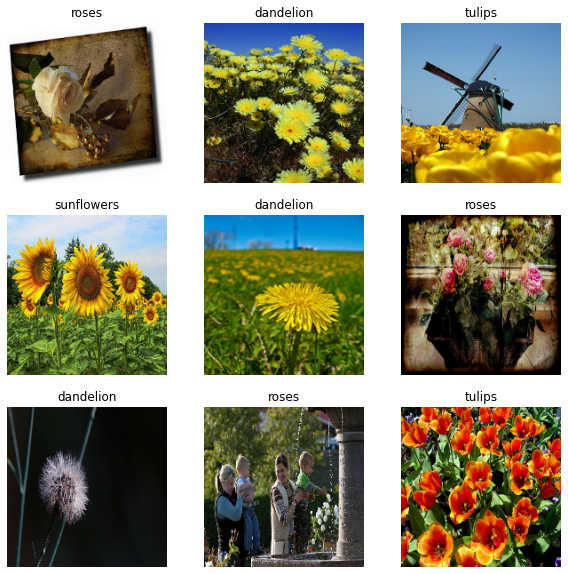

In [10]:
# Visualizing data
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
# Configure the dataset for performance
# AUTOTUNE = tf.data.AUTOTUNE  # TODO: module 'tensorflow._api.v2.data' has no attribute 'AUTOTUNE'

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=batch_size)
val_dataset = val_dataset.cache().prefetch(buffer_size=batch_size)

In [12]:
# Create the model
num_classes = 5

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Standardize data between 0-1
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [15]:
# Train the model
epochs=10
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs)

Epoch 1/10
92/92 [==============================] - 3s 34ms/step - loss: 1.3161 - accuracy: 0.4414 - val_loss: 1.1447 - val_accuracy: 0.5259
Epoch 2/10
92/92 [==============================] - 1s 16ms/step - loss: 1.0276 - accuracy: 0.5814 - val_loss: 0.9676 - val_accuracy: 0.5981
Epoch 3/10
92/92 [==============================] - 1s 16ms/step - loss: 0.8419 - accuracy: 0.6843 - val_loss: 0.9611 - val_accuracy: 0.6185
Epoch 4/10
92/92 [==============================] - 1s 16ms/step - loss: 0.6690 - accuracy: 0.7548 - val_loss: 0.9549 - val_accuracy: 0.6390
Epoch 5/10
92/92 [==============================] - 1s 16ms/step - loss: 0.4513 - accuracy: 0.8426 - val_loss: 1.0581 - val_accuracy: 0.6240
Epoch 6/10
92/92 [==============================] - 1s 16ms/step - loss: 0.2731 - accuracy: 0.9087 - val_loss: 1.2862 - val_accuracy: 0.6253
Epoch 7/10
92/92 [==============================] - 1s 16ms/step - loss: 0.1522 - accuracy: 0.9510 - val_loss: 1.3797 - val_accuracy: 0.6226
Epoch 8/10
92

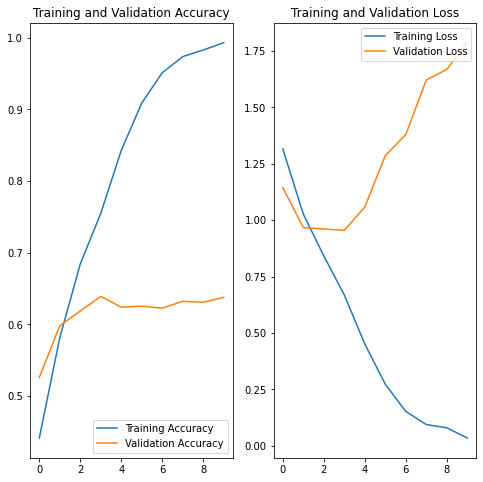

In [16]:
# Visualizing training result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

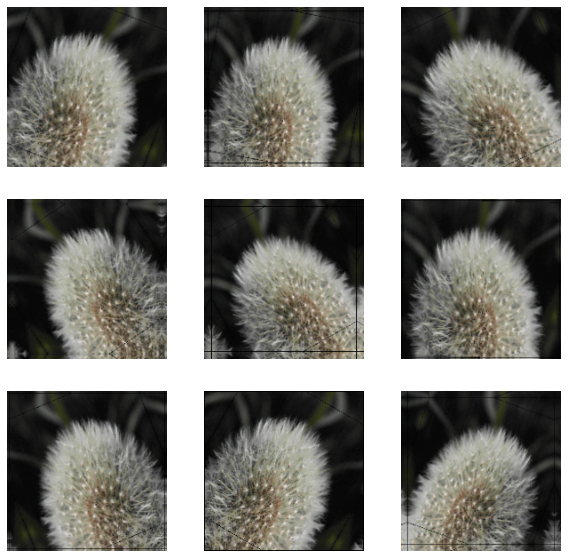

In [17]:
# Fixing overfitting issue
# 1. Data augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [18]:
# 2. Add a Dropout layer
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [21]:
epochs = 15
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 2s 19ms/step - loss: 1.3278 - accuracy: 0.4527 - val_loss: 1.0940 - val_accuracy: 0.5640
Epoch 2/15
92/92 [==============================] - 2s 18ms/step - loss: 1.0308 - accuracy: 0.5995 - val_loss: 1.0578 - val_accuracy: 0.5749
Epoch 3/15
92/92 [==============================] - 2s 18ms/step - loss: 0.9567 - accuracy: 0.6250 - val_loss: 0.9401 - val_accuracy: 0.6417
Epoch 4/15
92/92 [==============================] - 2s 18ms/step - loss: 0.8803 - accuracy: 0.6635 - val_loss: 0.9320 - val_accuracy: 0.6294
Epoch 5/15
92/92 [==============================] - 2s 17ms/step - loss: 0.8034 - accuracy: 0.6822 - val_loss: 0.9424 - val_accuracy: 0.6390
Epoch 6/15
92/92 [==============================] - 2s 18ms/step - loss: 0.7735 - accuracy: 0.6979 - val_loss: 0.7921 - val_accuracy: 0.6907
Epoch 7/15
92/92 [==============================] - 2s 17ms/step - loss: 0.7268 - accuracy: 0.7187 - val_loss: 0.8645 - val_accuracy: 0.6730
Epoch 8/15
92

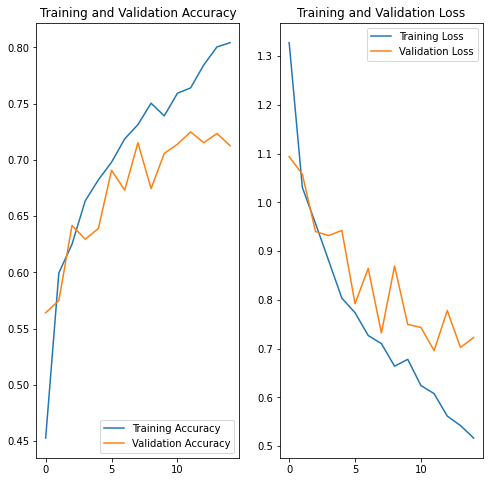

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sunflowers with a 88.13 percent confidence.
